In [2]:
import pandas as pd



In [3]:
df_walk_1 = pd.read_json("gehen-2023-05-26_07-39-48.json")
df_Auto_1 = pd.read_json("autofahren-2023-05-26_07-48-45.json")
df_bus_1 = pd.read_json("Bus_24.05-1-2023-05-24_10-49-43.json")

In [4]:
df_walk_1.head()
df_walk_1.columns

Index(['sensor', 'time', 'seconds_elapsed', 'z', 'y', 'x', 'altitude',
       'speedAccuracy', 'bearingAccuracy', 'latitude',
       'altitudeAboveMeanSeaLevel', 'bearing', 'horizontalAccuracy',
       'verticalAccuracy', 'longitude', 'speed', 'version', 'device name',
       'recording time', 'platform', 'appVersion', 'device id', 'sensors',
       'sampleRateMs', 'yaw', 'qx', 'qz', 'roll', 'qw', 'qy', 'pitch'],
      dtype='object')

In [8]:
df_walk_1.head()

,sensor,time,seconds_elapsed,z,y,x,altitude,speedAccuracy,bearingAccuracy,latitude,...,device id,sensors,sampleRateMs,yaw,qx,qz,roll,qw,qy,pitch
0,Accelerometer,1.685087e+18,1.036473,2.824855,-0.192988,-0.271774,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Accelerometer,1.685087e+18,2.033060,-0.342538,0.365158,-1.282551,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Accelerometer,1.685087e+18,3.029644,-4.201201,0.404010,-0.710063,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Accelerometer,1.685087e+18,4.026231,1.199325,2.623168,3.359652,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Accelerometer,1.685087e+18,5.022817,-1.525441,-1.230406,2.665533,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_Auto_1.head()

,sensor,time,seconds_elapsed,z,y,x,altitude,speedAccuracy,bearingAccuracy,latitude,...,device id,sensors,sampleRateMs,yaw,qx,qz,roll,qw,qy,pitch
0,Accelerometer,1.685087e+18,0.444758,0.034197,-0.074515,0.019053,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Accelerometer,1.685087e+18,1.441366,1.852312,2.691182,1.966580,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Accelerometer,1.685087e+18,2.437974,-5.768282,-3.087461,-1.986791,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Accelerometer,1.685087e+18,3.434586,-0.051814,0.050561,0.111605,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Accelerometer,1.685087e+18,4.431198,-0.059723,0.010639,0.053371,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:

df_types =pd.concat([df_walk_1.dtypes, df_Auto_1.dtypes, df_bus_1.dtypes], axis = 1)

df_types.columns = ['Walk', 'Bike', 'Bus']
df_types

,Walk,Bike,Bus
sensor,object,object,object
time,float64,float64,float64
seconds_elapsed,float64,float64,float64
z,float64,float64,float64
y,float64,float64,float64
x,float64,float64,float64
altitude,float64,float64,float64
speedAccuracy,float64,float64,float64
bearingAccuracy,float64,float64,float64
latitude,float64,float64,float64


In [11]:
# data preprocessing

# convert 'time' into date format
df_walk_1['time'] = pd.to_datetime(df_walk_1['time'])
df_Auto_1['time'] = pd.to_datetime(df_Auto_1['time'])
df_bus_1['time'] = pd.to_datetime(df_bus_1['time'])

display(df_walk_1.head(2), df_bike_1.head(2))

df_walk_1 = df_walk_1.set_index('time')
df_Auto_1 = df_Auto_1.set_index('time')
df_bus_1 = df_bus_1.set_index('time')

display(df_walk_1.head(2), df_Auto_1.head(2))

NameError: name 'df_bike_1' is not defined

In [12]:
#### Select and Plot the data

# show the available sensors

df_walk_1['sensor'].unique()
df_Auto_1['sensor'].unique()
df_bus_1['sensor'].unique()

array(['Accelerometer', 'Battery', 'Brightness', 'Gravity', 'Gyroscope',
       'Light', 'Location', 'Magnetometer', 'Metadata', 'Orientation'],
      dtype=object)

In [13]:
### select and plot accelerometer data from 

df_walk_1_acc = df_walk_1[df_walk_1['sensor'] == 'Accelerometer']
df_Auto_1_acc = df_Auto_1[df_Auto_1['sensor'] == 'Accelerometer']
df_bus_1_acc = df_bus_1[df_bus_1['sensor'] == 'Accelerometer']


# select only relevant columns

df_walk_1_acc = df_walk_1_acc[['y', 'x', 'z']]
df_Auto_1_acc = df_Auto_1_acc[['y', 'x', 'z']]
df_bus_1_acc = df_bus_1_acc[['y', 'x', 'z']]


<Axes: >

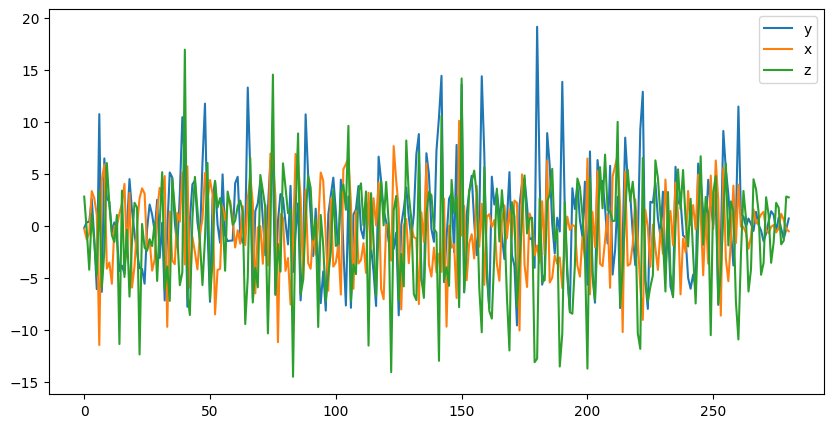

In [14]:
df_walk_1_acc.plot(figsize=(10,5))

<Axes: >

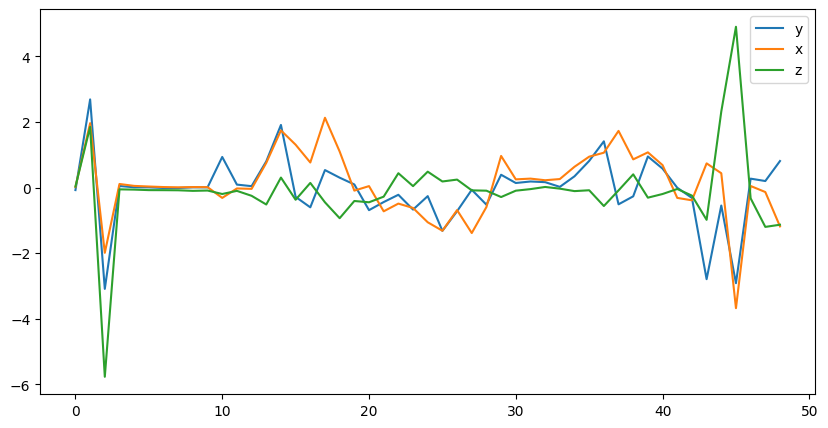

In [15]:
df_Auto_1_acc.plot(figsize=(10,5))

<Axes: >

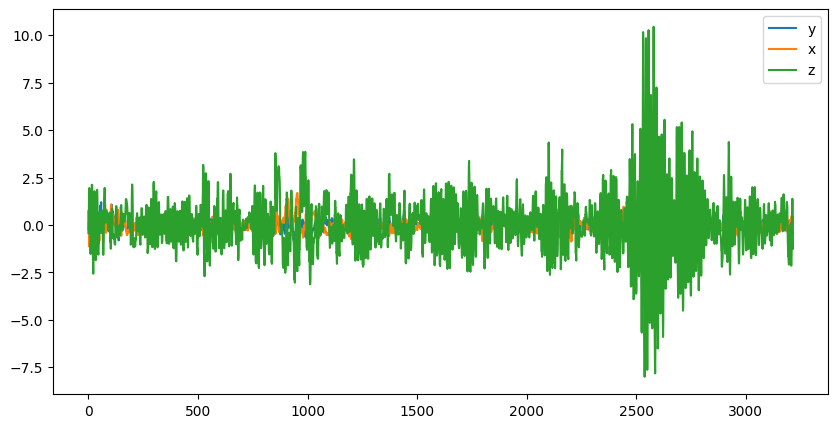

In [16]:
df_bus_1_acc.plot(figsize=(10,5))

In [17]:
df_walk_1.describe()

,time,seconds_elapsed,z,y,x,altitude,speedAccuracy,bearingAccuracy,latitude,altitudeAboveMeanSeaLevel,...,longitude,speed,version,yaw,qx,qz,roll,qw,qy,pitch
count,2531,2531.000000,1969.000000,1969.000000,1969.000000,281.000000,281.000000,281.000000,281.000000,281.000000,...,281.000000,281.000000,1.0,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000
mean,2023-05-26 07:42:08.831464192,140.577464,-33.621570,2.736065,-0.624279,385.359848,1.326539,42.932932,49.014698,339.769848,...,12.086222,1.370920,3.0,0.394776,0.235831,-0.495150,-1.243400,-0.367508,0.596859,-1.158314
min,2023-05-26 07:39:35.451727872,-12.802272,-250.465454,-77.495529,-37.864223,383.296201,-1.000000,-1.000000,49.013734,337.706201,...,12.083505,-1.000000,3.0,-3.036715,-0.271362,-0.710480,-3.122575,-0.991888,-0.096145,-1.537350
25%,2023-05-26 07:40:59.025532928,70.771533,-8.472808,-1.891116,-1.559265,384.496684,1.233754,34.238600,49.014524,338.906684,...,12.084840,1.280100,3.0,-0.399931,0.117833,-0.637082,-2.831825,-0.429379,0.513741,-1.403037
50%,2023-05-26 07:42:08.811368192,140.557368,-0.402054,0.774872,-0.149531,384.752800,1.414411,40.645120,49.014712,339.162800,...,12.086243,1.388887,3.0,-0.063550,0.271626,-0.577248,-1.449599,-0.356177,0.638230,-1.288306
75%,2023-05-26 07:43:18.818964224,210.564964,0.536985,9.140524,1.125478,385.260567,1.520350,48.853464,49.014909,339.670567,...,12.087644,1.520516,3.0,1.592737,0.335642,-0.531952,0.002419,-0.165266,0.785279,-1.219507
max,2023-05-26 07:44:29.381327104,281.127327,16.953746,50.860428,56.977585,406.848267,1.970000,157.044901,49.015119,361.258266,...,12.089041,2.477242,3.0,2.488650,0.750882,0.616124,3.139617,-0.015035,0.837315,0.547468
std,NaN,81.028749,76.672081,18.646028,10.481864,2.073527,0.352040,15.618140,0.000280,2.073527,...,0.001574,0.361160,NaN,1.131871,0.180801,0.260196,1.681559,0.242194,0.222710,0.493905
